# Work in progress

In [1]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

## First database developer_survey

In [2]:
developer_survey = pd.read_csv('dbs/developer_survey/survey_results.csv')
developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
conn_sql = sqlite.connect('MasterAll.db')
developer_survey.to_sql('developer_survey', con=conn_sql, if_exists='replace', index=False)

developer_survey = pd.read_sql('SELECT * FROM developer_survey', conn_sql)
developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,None,NaN,NaN,United Kingdom,Pound sterling,...,None,None,None,"Computer science, computer engineering, or sof...",None,None,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,None,NaN,NaN,Russian Federation,None,...,Neither easy nor difficult,Appropriate in length,None,None,None,None,Somewhat more welcome now than last year,NaN,4,None
3,4,I am a developer by profession,Yes,25.0,18,None,NaN,NaN,Albania,Albanian lek,...,None,None,No,"Computer science, computer engineering, or sof...",None,None,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,None,NaN,NaN,United States,None,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
conn_sql.commit()

In [5]:
cur = conn_sql.cursor()
cur.execute('Select distinct MainBranch from developer_survey')
cur.fetchall()

[('I am a developer by profession',),
 ('I code primarily as a hobby',),
 ('I used to be a developer by profession, but no longer am',),
 ('I am not primarily a developer, but I write code sometimes as part of my work',),
 ('I am a student who is learning to code',),
 (None,)]

In [6]:
#shape and dimension of dataframe developer_survey
print('Shape: ', developer_survey.shape)
print('Dimensions: ', developer_survey.ndim)

Shape:  (64461, 61)
Dimensions:  2


In [7]:
#checking types of data contained in dataframe
#for dt in developer_survey.dtypes:
    #print(dt)

developer_survey.dtypes

Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

In [9]:
#we want to predict job satisfaction hence we will drop some unecessary columns
developer_survey.drop(['Age1stCode', 'CompFreq', 'CompTotal', 'Country', 'CurrencyDesc', 
    'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'Ethnicity', 'JobFactors', 'LanguageDesireNextYear', 
    'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 
    'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWOffTopic', 
    'NEWOtherComms', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'PlatformDesireNextYear', 
    'PlatformWorkedWith', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 
    'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'YearsCodePro'], axis = 1, inplace = True)

developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,ConvertedComp,DevType,EdLevel,Employment,Gender,JobSat,JobSeek,NEWEdImpt,NEWLearn,NEWOnboardGood,NEWOvertime,OrgSize,PurchaseWhat,WorkWeekHrs,YearsCode
0,1,I am a developer by profession,Yes,NaN,NaN,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,Often: 1-2 days per week or more,2 to 9 employees,None,50.0,36
1,2,I am a developer by profession,No,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,Very dissatisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,None,"1,000 to 4,999 employees",I have little or no influence,NaN,7
2,3,I code primarily as a hobby,Yes,NaN,NaN,None,None,None,None,None,None,None,Once a decade,None,None,None,None,NaN,4
3,4,I am a developer by profession,Yes,25.0,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",Not at all important/not necessary,Once a year,Yes,Occasionally: 1-2 days per quarter but less th...,20 to 99 employees,I have a great deal of influence,40.0,7
4,5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,None,Very important,Once a year,None,None,None,None,NaN,15


In [10]:
developer_survey.dtypes

Respondent          int64
MainBranch         object
Hobbyist           object
Age               float64
ConvertedComp     float64
DevType            object
EdLevel            object
Employment         object
Gender             object
JobSat             object
JobSeek            object
NEWEdImpt          object
NEWLearn           object
NEWOnboardGood     object
NEWOvertime        object
OrgSize            object
PurchaseWhat       object
WorkWeekHrs       float64
YearsCode          object
dtype: object

In [11]:
replace_nums = {'YearsCode': {'Less than 1 year': 0, 'More than 50 years': 51}}
developer_survey = developer_survey.replace(replace_nums)
developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,ConvertedComp,DevType,EdLevel,Employment,Gender,JobSat,JobSeek,NEWEdImpt,NEWLearn,NEWOnboardGood,NEWOvertime,OrgSize,PurchaseWhat,WorkWeekHrs,YearsCode
0,1,I am a developer by profession,Yes,NaN,NaN,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,Often: 1-2 days per week or more,2 to 9 employees,None,50.0,36
1,2,I am a developer by profession,No,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,Very dissatisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,None,"1,000 to 4,999 employees",I have little or no influence,NaN,7
2,3,I code primarily as a hobby,Yes,NaN,NaN,None,None,None,None,None,None,None,Once a decade,None,None,None,None,NaN,4
3,4,I am a developer by profession,Yes,25.0,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",Not at all important/not necessary,Once a year,Yes,Occasionally: 1-2 days per quarter but less th...,20 to 99 employees,I have a great deal of influence,40.0,7
4,5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,None,Very important,Once a year,None,None,None,None,NaN,15


In [12]:
#we change to numeric immediately YearsCode as it now contains only numbers; other object types we'll have to use LabelEncoder
developer_survey['YearsCode'] = pd.to_numeric(developer_survey['YearsCode'])
developer_survey.dtypes

Respondent          int64
MainBranch         object
Hobbyist           object
Age               float64
ConvertedComp     float64
DevType            object
EdLevel            object
Employment         object
Gender             object
JobSat             object
JobSeek            object
NEWEdImpt          object
NEWLearn           object
NEWOnboardGood     object
NEWOvertime        object
OrgSize            object
PurchaseWhat       object
WorkWeekHrs       float64
YearsCode         float64
dtype: object

In [13]:
#check if any column has missing/nan values

developer_survey[developer_survey.isnull().any(axis=1)]

,Respondent,MainBranch,Hobbyist,Age,ConvertedComp,DevType,EdLevel,Employment,Gender,JobSat,JobSeek,NEWEdImpt,NEWLearn,NEWOnboardGood,NEWOvertime,OrgSize,PurchaseWhat,WorkWeekHrs,YearsCode
0,1,I am a developer by profession,Yes,NaN,NaN,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,Often: 1-2 days per week or more,2 to 9 employees,None,50.0,36.0
1,2,I am a developer by profession,No,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,Very dissatisfied,I am not interested in new job opportunities,Fairly important,Once a year,None,None,"1,000 to 4,999 employees",I have little or no influence,NaN,7.0
2,3,I code primarily as a hobby,Yes,NaN,NaN,None,None,None,None,None,None,None,Once a decade,None,None,None,None,NaN,4.0
3,4,I am a developer by profession,Yes,25.0,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",Not at all important/not necessary,Once a year,Yes,Occasionally: 1-2 days per quarter but less th...,20 to 99 employees,I have a great deal of influence,40.0,7.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,None,Very important,Once a year,None,None,None,None,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,None,Yes,NaN,NaN,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,None,None,None,Very important,Once a decade,None,None,None,None,NaN,10.0
64457,64867,None,Yes,NaN,NaN,None,None,Employed full-time,None,None,None,None,None,None,None,None,None,NaN,NaN
64458,64898,None,Yes,NaN,NaN,None,Primary/elementary school,None,None,None,None,None,None,None,None,None,None,NaN,NaN
64459,64925,None,Yes,NaN,NaN,None,None,Employed full-time,None,None,None,None,Once a year,None,None,None,None,NaN,NaN


In [14]:
developer_survey.isnull().sum()

Respondent            0
MainBranch          299
Hobbyist             45
Age               19015
ConvertedComp     29705
DevType           15091
EdLevel            7030
Employment          607
Gender            13904
JobSat            19267
JobSeek           12734
NEWEdImpt         15996
NEWLearn           8305
NEWOnboardGood    21838
NEWOvertime       21230
OrgSize           20127
PurchaseWhat      25097
WorkWeekHrs       23310
YearsCode          6777
dtype: int64

# Database Police arrests NOT USED

In [15]:
police_arrests = pd.read_csv('dbs/crime/police-arrests-made.csv',  sep= ';')
police_arrests.head()

,Incident Id,Date of Arrest,Time of Arrest,Primary Charge,Address,Arrestee's Age,Arrestee's Race,Arrestee's Gender,Arrestee's Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present
0,24071,2010-01-01,0:36,UNDERAGE POSSESSION,LAKESHORE LN/SHADY LAWN RD CHAPEL HILL NC,NaN,NaN,NaN,NaN,SUMMONED/CITED,Y,UNARMED
1,24078,2010-01-01,4:30,UNDERAGE POSSESSION,505 RED BUD RD CHAPEL HILL NC 27514,18.0,W,M,N,SUMMONED/CITED,Y,UNARMED
2,24080,2010-01-01,7:52,FAIL TO APPEAR/COMPL,113 NORTH ESTES DRIVE CHAPEL HILL NC 27514,18.0,W,M,NaN,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED
3,24082,2010-01-01,15:42,RESISTING ARREST,110 NEW STATESIDE DR CHAPEL HILL NC 27516,27.0,W,M,N,ON VIEW,U,UNARMED
4,24083,2010-01-01,16:13,BURGLARY-1ST DEGREE,529 HILLSBOROUGH STREET CHAPEL HILL NC 27514,48.0,A,M,H,TAKEN INTO CUSTODY (WARRANT/LP),Y,UNARMED


In [16]:
police_arrests.columns = police_arrests.columns.str.replace(' ','_')
police_arrests.columns = police_arrests.columns.str.replace("'",'')
police_arrests.columns = police_arrests.columns.str.lower()
police_arrests.head()

,incident_id,date_of_arrest,time_of_arrest,primary_charge,address,arrestees_age,arrestees_race,arrestees_gender,arrestees_ethnicity,type_of_arrest,drugs_or_alcohol_present,weapon_present
0,24071,2010-01-01,0:36,UNDERAGE POSSESSION,LAKESHORE LN/SHADY LAWN RD CHAPEL HILL NC,NaN,NaN,NaN,NaN,SUMMONED/CITED,Y,UNARMED
1,24078,2010-01-01,4:30,UNDERAGE POSSESSION,505 RED BUD RD CHAPEL HILL NC 27514,18.0,W,M,N,SUMMONED/CITED,Y,UNARMED
2,24080,2010-01-01,7:52,FAIL TO APPEAR/COMPL,113 NORTH ESTES DRIVE CHAPEL HILL NC 27514,18.0,W,M,NaN,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED
3,24082,2010-01-01,15:42,RESISTING ARREST,110 NEW STATESIDE DR CHAPEL HILL NC 27516,27.0,W,M,N,ON VIEW,U,UNARMED
4,24083,2010-01-01,16:13,BURGLARY-1ST DEGREE,529 HILLSBOROUGH STREET CHAPEL HILL NC 27514,48.0,A,M,H,TAKEN INTO CUSTODY (WARRANT/LP),Y,UNARMED


In [17]:
#we convert date_of_arrest and time_of_arrest to timestamp of elapse time from 1970-01-01 00:00:00
police_arrests["timestamp"] = pd.to_datetime(police_arrests['date_of_arrest']+' '+police_arrests['time_of_arrest']).astype(int)//(10**9)

In [18]:
police_arrests['timestamp']

0        1262306160
1        1262320200
2        1262332320
3        1262360520
4        1262362380
            ...    
16035    1561523280
16036    1561669260
16037    1561757400
16038    1561806060
16039    1561836120
Name: timestamp, Length: 16040, dtype: int64

In [19]:
conn_sql = sqlite.connect('MasterAll.db')
police_arrests.to_sql('police_arrests', con=conn_sql, if_exists='replace', index=False)

police_arrests = pd.read_sql('SELECT * FROM police_arrests', conn_sql)
police_arrests.head()

,incident_id,date_of_arrest,time_of_arrest,primary_charge,address,arrestees_age,arrestees_race,arrestees_gender,arrestees_ethnicity,type_of_arrest,drugs_or_alcohol_present,weapon_present,timestamp
0,24071,2010-01-01,0:36,UNDERAGE POSSESSION,LAKESHORE LN/SHADY LAWN RD CHAPEL HILL NC,NaN,None,None,None,SUMMONED/CITED,Y,UNARMED,1262306160
1,24078,2010-01-01,4:30,UNDERAGE POSSESSION,505 RED BUD RD CHAPEL HILL NC 27514,18.0,W,M,N,SUMMONED/CITED,Y,UNARMED,1262320200
2,24080,2010-01-01,7:52,FAIL TO APPEAR/COMPL,113 NORTH ESTES DRIVE CHAPEL HILL NC 27514,18.0,W,M,None,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,1262332320
3,24082,2010-01-01,15:42,RESISTING ARREST,110 NEW STATESIDE DR CHAPEL HILL NC 27516,27.0,W,M,N,ON VIEW,U,UNARMED,1262360520
4,24083,2010-01-01,16:13,BURGLARY-1ST DEGREE,529 HILLSBOROUGH STREET CHAPEL HILL NC 27514,48.0,A,M,H,TAKEN INTO CUSTODY (WARRANT/LP),Y,UNARMED,1262362380


In [20]:
conn_sql.commit()

In [21]:
#shape and dimension of dataframe police_arrests
print('Shape: ', police_arrests.shape)
print('Dimensions: ', police_arrests.ndim)

Shape:  (16040, 13)
Dimensions:  2


In [22]:
#checking types of data contained in dataframe
police_arrests.dtypes

incident_id                   int64
date_of_arrest               object
time_of_arrest               object
primary_charge               object
address                      object
arrestees_age               float64
arrestees_race               object
arrestees_gender             object
arrestees_ethnicity          object
type_of_arrest               object
drugs_or_alcohol_present     object
weapon_present               object
timestamp                     int64
dtype: object

In [23]:
race = pd.read_sql('Select sum(case when arrestees_race  = "W" then 1 else 0 end) AS White, sum(case when arrestees_race = "A" then 1 else 0 end) AS Asian,sum(case when arrestees_race = "B" then 1 else 0 end) AS Black,sum(case when arrestees_race = "H" then 1 else 0 end) AS Hispanic,sum(case when arrestees_race = "I" then 1 else 0 end) AS NativeAmerican,\nsum(case when arrestees_race = "O" then 1 else 0 end) AS Other,sum(case when arrestees_race = "U" then 1 else 0 end) AS Unknown,sum(case when arrestees_race = "N" then 1 else 0 end) AS None from police_arrests', conn_sql)
race

,White,Asian,Black,Hispanic,NativeAmerican,Other,Unknown,None
0,7339,360,7270,56,41,11,3,0


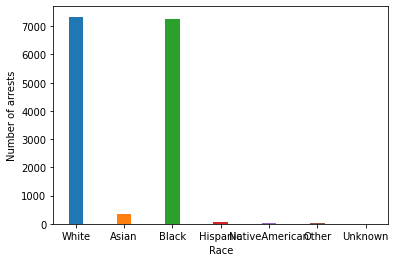

In [24]:
plt.figure()
plt.bar('White', race.White, width=0.3)
plt.bar('Asian', race.Asian, width=0.3)
plt.bar('Black', race.Black, width=0.3)
plt.bar('Hispanic', race.Hispanic, width=0.3)
plt.bar('NativeAmerican', race.NativeAmerican, width=0.3)
plt.bar('Other', race.Other, width=0.3)
plt.bar('Unknown', race.Unknown, width=0.3)
plt.ylabel('Number of arrests')
plt.xlabel('Race')
plt.show()